# Polynomial Regression

## Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
ds = pd.read_csv('Position_Salaries.csv')

In [8]:
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
X = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].values

In [10]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Visualising the dataset

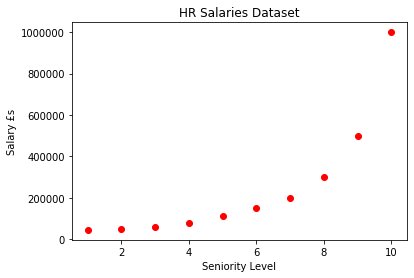

In [11]:
# As the dataset appears to be following a parabolic path, a linear regression will be a poor fit.

plt.scatter(X, y, c='red')
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()

## Taking care of missing data

In [1]:
# There is no missing data

## Encoding categorical data

In [2]:
# There is no categorical data to encode

## Splitting the dataset into the training set and test set

In [3]:
# As the dataset is small, we will not be splitting the dataset into the training set and testing set as we wish 
# to have maximum accuracy, therefore taking the whole data into consideration. As this is a salary negotiation,
# we must be confident in our model as the negotiation can fall apart if we go ahead with inaccurate presumptions.

## Feature Scaling

In [4]:
# We do not require feature scaling as the linear_model library takes care of this for us. We are only adding 
# polynomial terms to the multiple linear regression equation, therefore the linear regression library

## Fitting the polynomial terms to the dataset

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

In [14]:
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Fitting the Linear Regression to the dataset

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Polynomial Linear Regression model

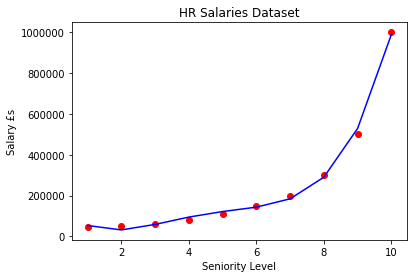

In [19]:
plt.scatter(X, y, c='red')
plt.plot(X, lr.predict(poly.fit_transform(X)), c='blue')
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()

## Visualising the Polynomial Regression Model in higher resolution (smoother curve)

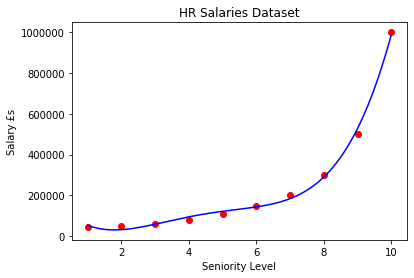

In [20]:
X_grid = np.arange(min(X), max(X), step = 0.01)
X_grid = X_grid.reshape((len(X_grid)), 1)
plt.scatter(X, y, c='red')
plt.plot(X_grid, lr.predict(poly.fit_transform(X_grid)), c='blue')
plt.title('HR Salaries Dataset')
plt.xlabel('Seniority Level')
plt.ylabel('Salary £s')
plt.show()

## Predicting the position level 6.5

In [21]:
y_pred = lr.predict(poly.transform([[6.5]]))

In [22]:
print(y_pred)

[158862.4526516]
